# TITANIC - Because everyone loves Leonardo DiCaprio 

Let's start our journey of predicting who all died in the cross atlantic boat ride of Titanic by importing the necessary libraries.

In [155]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Now, let's import all the datasets to proceed towards the understanding of the problem.

In [156]:
train_df = pd.read_csv(r"D:\Utkarsh Mathur\Career\Data Science\Datasets\Titanic\train.csv")
test_df = pd.read_csv(r"D:\Utkarsh Mathur\Career\Data Science\Datasets\Titanic\test.csv")

## Understanding the data with some EDA and Data reprocessing

The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime marine disasters in history.

Titanic received six warnings of sea ice on 14 April but was travelling about 22 knots when her lookouts sighted the iceberg. Unable to turn quickly enough, the ship suffered a glancing blow that buckled her starboard side and opened six of her sixteen compartments to the sea (the forepeak, all three holds, and boiler rooms 5 and 6). Titanic had been designed to stay afloat with four of her forward compartments flooded but no more, and the crew soon realised that the ship would sink. They used distress flares and radio (wireless) messages to attract help as the passengers were put into lifeboats.

In accordance with existing practice, Titanic's lifeboat system was designed to ferry passengers to nearby rescue vessels, not to hold everyone on board simultaneously; therefore, with the ship sinking rapidly and help still hours away, there was no safe refuge for many of the passengers and crew. Poor management of the evacuation meant many boats were launched before they were completely full.

I think it is crucial that we look into the data we are proveided to understand the loss suffered in the tragedy.

In [157]:
#To know the amount of complete information given to us, let's see what's the shape of the training set and test set.
train_df.shape, test_df.shape 

((891, 12), (418, 11))

So, we know the fate of 891 passengers and casualty rate in some 418 passengers is unknown.
Our job is to predict the fate of these 418 passengers on the basis of information provided to us about the 891 passengers. 

In [158]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Column Dictionary
|Variable            |	Definition                                 | Key                                            |
|:-----------------: | :-----------------------------------------: | :--------------------------------------------: |
|survival            |	Survival                                   | 0 = No, 1 = Yes                                |
|pclass	             | Ticket class	                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
|sex                 |	Sex                                        |	                                            | 
|Age                 |	Age in years                               |	                                            |
|sibsp               |	# of siblings / spouses aboard the Titanic |                                                |	
|parch	             | # of parents / children aboard the Titanic  |                                                |	
|ticket              |	Ticket number	                           |                                                |
|fare	             | Passenger fare	                           |                                                |
|cabin	             | Cabin number	                               |                                                |
|embarked	         | Port of Embarkation	                       | C = Cherbourg, Q = Queenstown, S = Southampton |

Well, I vivdly remember the captain saying the "Women and Children first", so let's see how much was he able to impliment it.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

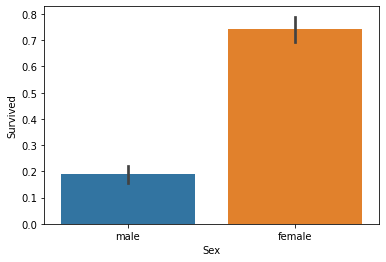

In [159]:
sns.barplot(x="Sex", y="Survived", data=train_df)

So, here we can see that the survival rate in females was over 0.7 while the survival rate in men was below 0.2.
Now, let's see the agewise distribution of survival rate.

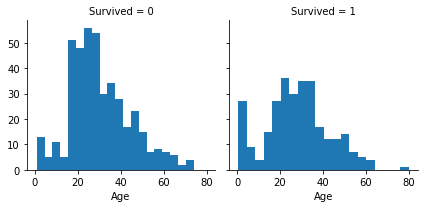

In [160]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

We can clearly see that children below the age of 10 survived more than others.
So clearly, the captain tried his best to be true to his words.

Now, let's see how much the data is filled.

In [161]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now, as we see the columns 'Age', 'Cabin' and 'Embarked' have some null values we'll try to ractify the issue by filling the null values.<br>
As we know clearly the the place of embarkment and cabin number has no connection with survival of a person, we'll ignore them and fill the null value of age with median age of the passengers.<br>

In [182]:
train_df.Age = train_df.Age.fillna(train_df.Age.median())

In [163]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we are now proceeding towards the model making section, let's get rid of all the information that is not needed in predicting a passengers survival.<br>
Of all the information we've regarding the passenger, the informations I beleive are necessary are Passenger class(because money speaks for itself), age, gender and number of family members(because it increase a passengers polarisation towards a particular deicision made in the moments of chaos).<br>

In [164]:
train_df.drop(['Ticket','Fare','Cabin','Embarked','PassengerId','Name'], axis=1, inplace=True)

In [165]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [166]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Family
0,0,3,male,22.0,1,0,1
1,1,1,female,38.0,1,0,1
2,1,3,female,26.0,0,0,0
3,1,1,female,35.0,1,0,1
4,0,3,male,35.0,0,0,0


In [167]:
train_df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [168]:
train_df.Sex.replace({"female":0,"male":1}, inplace=True)

In [169]:
train_df.head()

,Survived,Pclass,Sex,Age,Family
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


And finally, let's break our training set into features and expected output.

In [170]:
train_x = train_df.iloc[:,1:]
train_y = train_df.iloc[:,0]

In [171]:
train_x.head()

,Pclass,Sex,Age,Family
0,3,1,22.0,1
1,1,0,38.0,1
2,3,0,26.0,0
3,1,0,35.0,1
4,3,1,35.0,0


## Model Making

I am going to use Supoort Vector Machine with linear kernels to train my model.<br>

In [172]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Preparing Test data for predictions

In [173]:
test_df['Family'] = test_df['SibSp'] + test_df['Parch'] 
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [174]:
test = test_df.drop(['Ticket','Fare','Cabin','Embarked','PassengerId','Name','SibSp','Parch'], axis=1)
test.head()

,Pclass,Sex,Age,Family
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,2


In [175]:
test.Sex.replace({"female":0,"male":1}, inplace=True)
test.head()

,Pclass,Sex,Age,Family
0,3,1,34.5,0
1,3,0,47.0,1
2,2,1,62.0,0
3,3,1,27.0,0
4,3,0,22.0,2


In [176]:
test.isnull().sum()

Pclass     0
Sex        0
Age       86
Family     0
dtype: int64

In [177]:
test.Age = test.Age.fillna(test.Age.mean())

## Making Predictions over the test data

In [178]:
pred = classifier.predict(test)

In [179]:
type(pred)

numpy.ndarray

In [181]:
sub = pd.DataFrame()
sub['PassengerId'] = test_df['PassengerId']
sub['Survived'] = pred
# sub['Survived'] = sub.apply(lambda r: leaks[int(r['PassengerId'])] if int(r['PassengerId']) in leaks else r['Survived'], axis=1)
sub.to_csv('submission.csv', index=False)